In [22]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtpl
import matplotlib.dates as mdates
from math import log




In [27]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 24.1 MB/s eta 0:00:0000:0100:01


In [23]:
df = pd.read_csv('media_info.csv')
df = df[df['category'] != 'Media']
df = df[df['retweet'] != 'retweeted']
df['created_at'] = pd.to_datetime(df['created_at'], format = '%Y-%m-%d')
df = df.sort_values(by='created_at')

In [24]:
df_media = df.query('photo != 0 | video != 0')
df_no_media = df.query('photo == 0 & video == 0')

In [25]:
count_media = df_media.groupby("created_at")["tweetID"].count()
count_no_media = df_no_media.groupby("created_at")["tweetID"].count()

In [ ]:
["#E69F00", "#56B4E9",

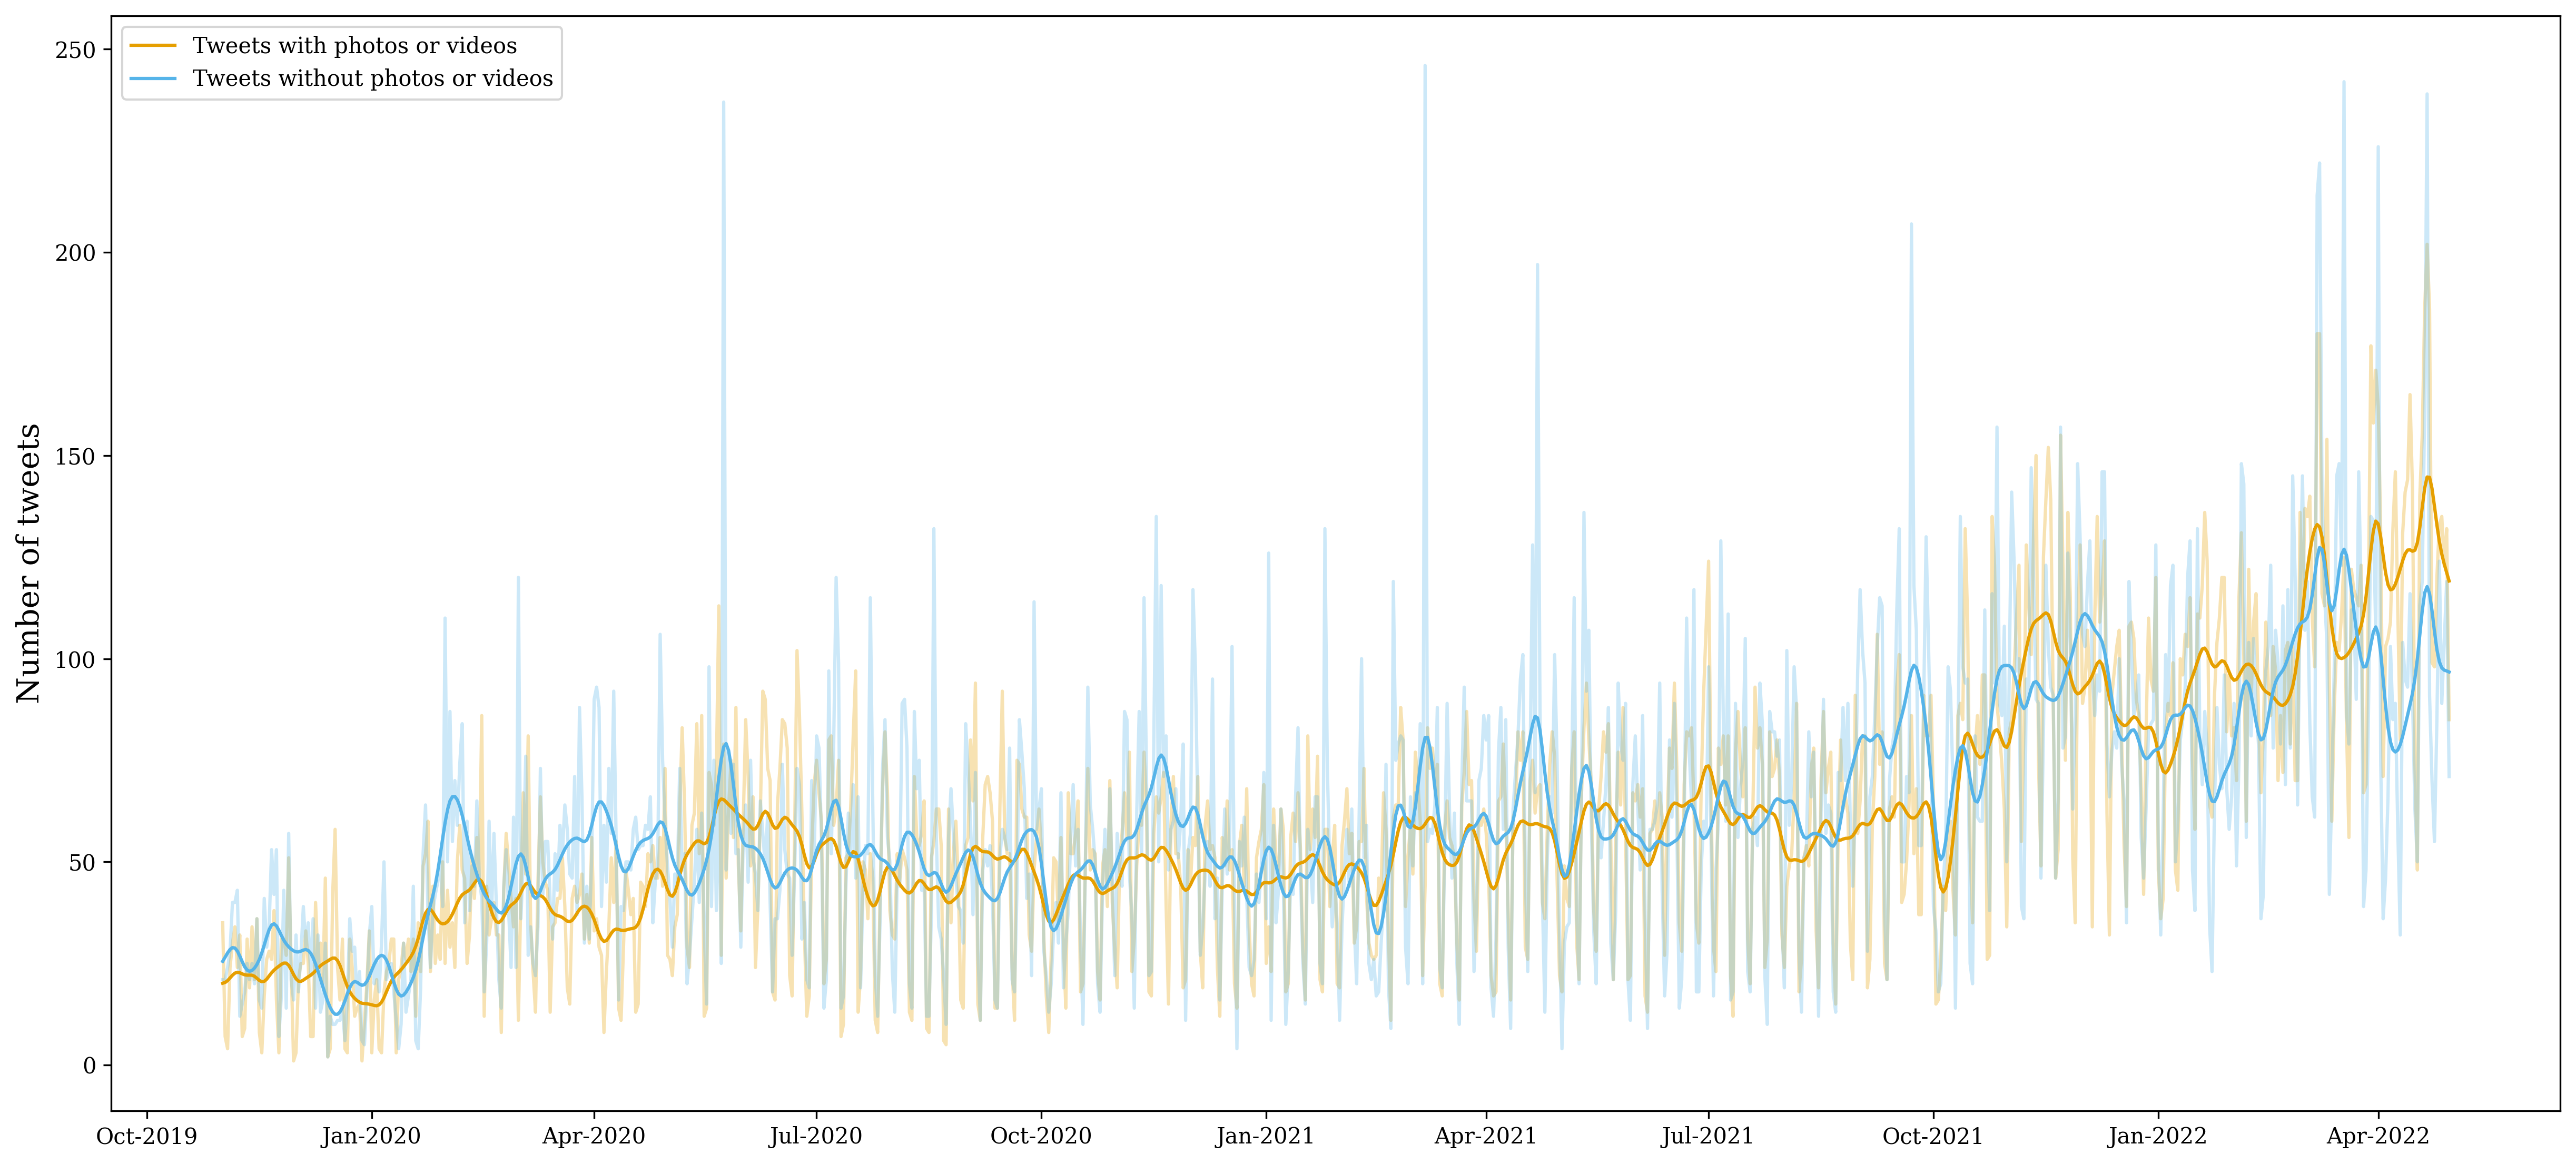

In [32]:
date_form = mdates.DateFormatter("%b-%Y")

fig, ax = plt.subplots(1, 1, figsize=(20, 9))
ax.plot(count_media, alpha = 0.3, color = "#E69F00")
ax.plot(count_no_media, alpha = 0.3, color = "#56B4E9")

gaussian_media = count_media.rolling(window=20, win_type='gaussian', center=True, min_periods=1).mean(std = 3)
gaussian_no_media = count_no_media.rolling(window=20, win_type='gaussian', center=True, min_periods=1).mean(std = 3)

ax.plot(gaussian_media, alpha = 1, label = "Tweets with photos or videos",  color = "#E69F00")
ax.plot(gaussian_no_media, alpha = 1, label = "Tweets without photos or videos", color = "#56B4E9")
 
ax.xaxis.set_major_formatter(date_form)

ax.set_ylabel('Number of tweets')

ax.legend()


In [ ]:
print('ORIGINAL DIPLOMAT TWEETS WITH IMAGES OR VIDEOS')
print('Number of tweets in this subset:')
print(len(df_media['retweet_count']))
print('Mean number of retweets:')
print(df_media['retweet_count'].sum()/len(df_media['retweet_count']))
print('Standard deviation:')
print(np.std(df_media['retweet_count']))

print('\nORIGINAL DIPLOMAT TWEETS WITHOUT IMAGES OR VIDEOS')
print('Number of tweets in this subset:')
print(len(df_no_media['retweet_count']))
print('Mean number of retweets:')
print(df_no_media['retweet_count'].sum()/len(df_no_media['retweet_count']))
print('Standard deviation:')
print(np.std(df_no_media['retweet_count']))

ORIGINAL DIPLOMAT TWEETS WITH IMAGES OR VIDEOS
Number of tweets in this subset:
53704
Mean number of retweets:
32.97676150752272
Standard deviation:
229.91463131293216

ORIGINAL DIPLOMAT TWEETS WITHOUT IMAGES OR VIDEOS
Number of tweets in this subset:
55717
Mean number of retweets:
16.97869590968645
Standard deviation:
145.98482711955322


In [ ]:
mtpl.rcParams['font.family'] = 'serif'
mtpl.rcParams['figure.titlesize'] = 20
mtpl.rcParams['axes.labelsize'] = 14
mtpl.rcParams['xtick.labelsize'] = 10
mtpl.rcParams['ytick.labelsize'] = 10
mtpl.rcParams['legend.fontsize'] = 10
mtpl.rcParams['figure.dpi'] = 300

date_form = mdates.DateFormatter("%b-%Y")

palette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

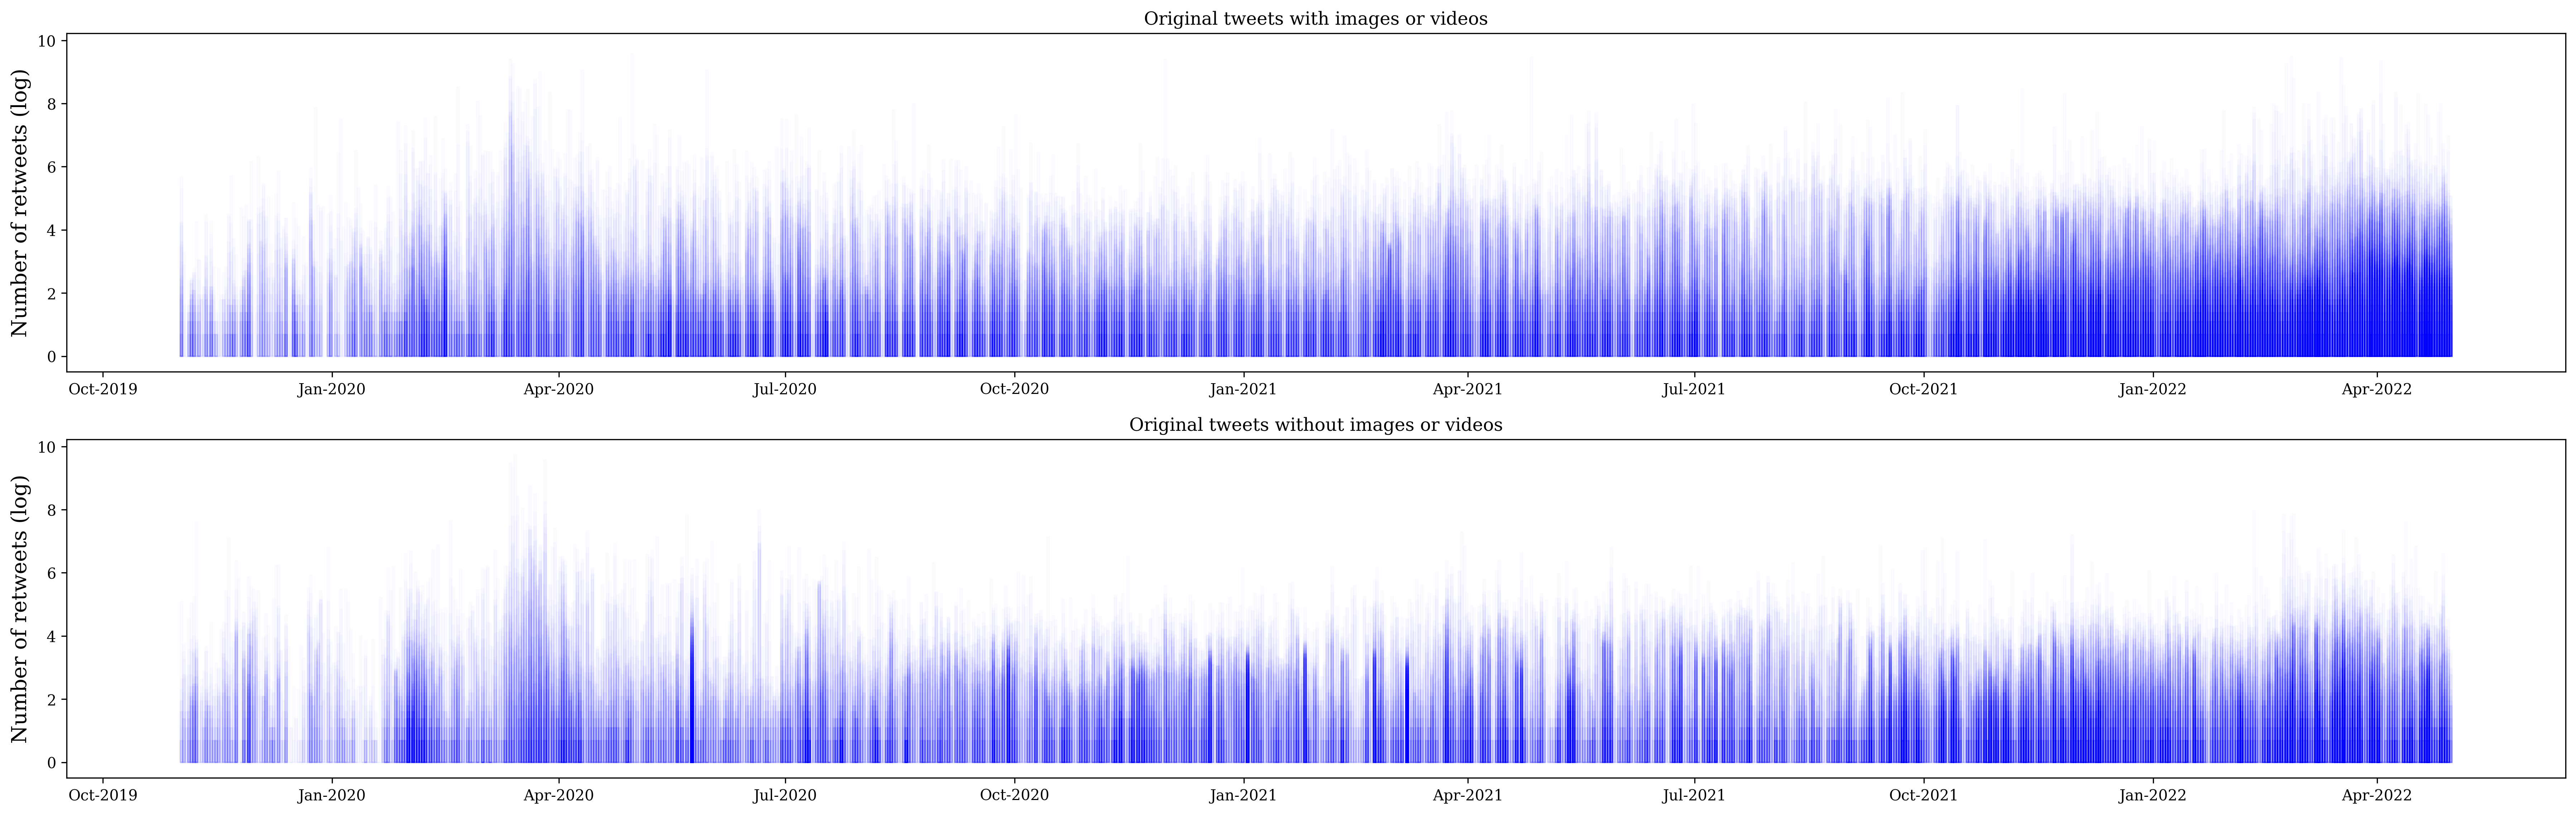

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(30, 9), sharey=True)

# plot the original tweets with images or videos
for i, row in df_media.iterrows():
    if row['retweet_count'] != 0:
        ax[0].fill_between([row['created_at'], row['created_at'] + pd.Timedelta(days=1)], [0, 0], [log(row['retweet_count']), log(row['retweet_count'])], color='blue', alpha=0.01)
ax[0].set_title('Original tweets with images or videos')
ax[0].set_ylabel('Number of retweets (log)')
ax[0].xaxis.set_major_formatter(date_form)


# plot the original tweets without images or videos
for i, row in df_no_media.iterrows():
    if row['retweet_count'] != 0:
        ax[1].fill_between([row['created_at'], row['created_at'] + pd.Timedelta(days=1)], [0, 0], [log(row['retweet_count']), log(row['retweet_count'])], color='blue', alpha=0.01)
ax[1].set_title('Original tweets without images or videos')
ax[1].set_ylabel('Number of retweets (log)')
ax[1].xaxis.set_major_formatter(date_form)


plt.savefig(os.path.join('figs', 'retweets.png'), bbox_inches='tight')

In [ ]:
# testing stuffssss

# create a 3d numpy array
# first dimension is the number of tweets on a given day
# second dimension is the number of retweets
# third dimension is the number of days

n_days = len(np.unique(df['created_at']))
n_tweets = len(df.groupby('created_at').count().max())
n_retweets = df['retweet_count'].max().astype(int)


test_array = np.zeros((n_tweets, n_retweets, n_days))

for i, row in df.iterrows():
    day_converted = row['created_at'].toordinal() - df['created_at'].min().toordinal()
    # fill array with number of retweets
    test_array[row['retweet_count'], day_converted] += 1
